In [1]:
from torch.utils.data import DataLoader
import sys
import time

import numpy as np
import  pandas as pd
import  torch
from torchvision import models, transforms,datasets
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import Counter
from src.model import SkinCancerModel
from src.dataset import MelanomaDataset,data_preprocessing
from torch.utils.data import DataLoader
from torch.optim import Adam
import time

# Data preprocessing

In [21]:
dataset_path="..\\dataset\\raw"
weights_path="..\\model_weights\\weights.pt"
transform1=transforms.Compose([transforms.ToTensor(),transforms.Resize((240,240))])

train_path=os.path.join(dataset_path,'train\\')
test_path=os.path.join("..\\dataset\\preprocessed",'test\\')
valid_path=os.path.join(dataset_path,'valid\\')
class_name_idx={"melanoma":1,"nevus":0,"seborrheic_keratosis":0}
train_data=MelanomaDataset(train_path,class_name_idx,transform1)
test_data=MelanomaDataset(test_path,class_name_idx,transforms.ToTensor())

In [4]:
resize=transforms.Resize((240,240))
prep_path="../dataset/preprocessed/train"
data_preprocessing(train_path,prep_path,resize)


KeyboardInterrupt



In [ ]:
resize=transforms.Resize((240,240))
prep_path="../dataset/preprocessed/test"
data_preprocessing(test_path,prep_path,resize)

In [ ]:
resize=transforms.Resize((240,240))
prep_path="../dataset/preprocessed/valid"
data_preprocessing(valid_path,prep_path,resize)

In [56]:
from PIL import Image
train_classes_list=os.listdir(train_path)
list1=[]
resize=transforms.Resize((240,240))
prep_path="../dataset/preprocessed/train"
for class_name in train_classes_list:
        class_path=train_path+class_name
        imgs_list=os.listdir(class_path)
        if not os.path.exists(f"{prep_path}/{class_name}"):
                os.mkdir(f"{prep_path}/{class_name}")
        for img_name in imgs_list:
                img_path=class_path+ '/' +img_name
                image=Image.open(img_path)
                cropped_img=resize(image)
                cropped_img.save(f"{prep_path}/{class_name}/{img_name}")


In [5]:
train_loader=DataLoader(train_data,shuffle=True,batch_size=4)

In [50]:
itr=iter(train_data)
img,value=next(itr)
print(img.shape)

torch.Size([3, 380, 380])


In [22]:
test_loader=DataLoader(test_data,shuffle=True,batch_size=1)
img,l=next(iter(test_data))
print(len(test_loader))

600


In [23]:
for i in range(374):
        img,value=next(itr)

tensor([0.])


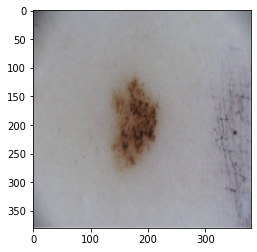

In [24]:
img,value=next(itr)
print(value)
plt.imshow(img.numpy().transpose([1,2,0]))
plt.show()

In [8]:
from src.model import SkinCancerModel

In [3]:
model

NameError: name 'model' is not defined

In [5]:
model=SkinCancerModel(True,"efficientnet_b1")


In [6]:
model.load_local_weights(weights_path)

In [7]:
model

SkinCancerModel(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation

In [10]:
len(model.features)

9

In [11]:
for i in range(5):
        for par in model.features[i].parameters():
          par.requires_grad=False

In [7]:
model.save_weights("weights.pt")

In [8]:
model.load_local_weights("weights.pt")

In [8]:
from torch.optim import Adam
import time
optimizer=Adam(model.parameters(),lr=0.01)
loss_function=torch.nn.BCELoss()

In [13]:
epochs=1000
batch_size=train_loader.batch_size
no_batches=len(train_loader)
dataset_size=float(len(train_loader.dataset))
model.cuda()
model.train()
for e in range(epochs):
        loss_sum=0.0
        cnt=0.0
        time_sum=0.0
        for img,value in train_loader:
                ts=time.time()
                optimizer.zero_grad()
                img=img.cuda()
                output=model(img)
                value=value.cuda()

                loss=loss_function(output,value)

                loss.backward()
                optimizer.step()
                loss_sum+=loss.item()*batch_size
                cnt+=1.0

                finished=int((cnt*10)/no_batches)
                remaining=10-finished
                te=time.time()
                time_sum+=(te-ts)
                avg_time=time_sum/cnt
                time_remaing=avg_time*(no_batches-cnt)
                sys.stdout.write("\r ephoch "+str(e+1)+" ["+str("="*int((cnt*10)/no_batches)+str("."*remaining)+"] time remaining = "+str(time_remaing/60.0)[:8]))
        print(f" epoch {e+1} loss ={loss_sum/dataset_size}")


KeyboardInterrupt



In [10]:
model.cuda()

SkinCancerModel(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation

In [25]:
count=0
loss_test=0.0
model.eval()
with torch.no_grad():
        for img ,lab in test_loader:
                # img=img.unsqueeze(0)
                img=img.cuda()
                lab=lab.cuda()

                result=model(img)
                loss_test=loss_function(result,lab)
                if result>0.5:
                       result=1
                else:
                        result=0

                if result==lab:
                        count+=1


In [26]:
accuracy=(count/len(test_loader))*100
print(accuracy)

82.0


In [22]:
   torch.cuda.empty_cache()

In [28]:
import torch
ss=torch.tensor([1,2,3])
ss.unsqueeze(1)

tensor([[1],
        [2],
        [3]])